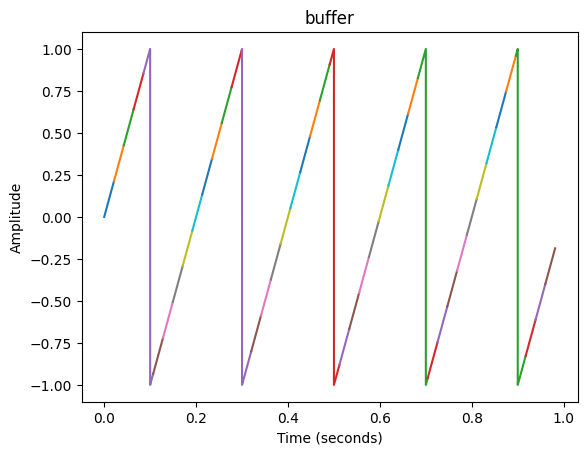

In [56]:
import numpy as np
import matplotlib.pyplot as plt

sampleRate = 48000
timeSecond = 1
bufferSize = 1024
oscFrequency = 10

numBuffers = int(np.ceil(sampleRate * timeSecond / bufferSize))
wavSignal = np.zeros(sampleRate*timeSecond) 
time = np.arange(0, timeSecond, 1/sampleRate)

# sawtooth
for i in range(0, len(wavSignal)):
    wavSignal[i] = 2 * (time[i] * oscFrequency - np.floor(0.5 + time[i] * oscFrequency))

buffers = np.zeros((numBuffers, bufferSize))
for i in range(numBuffers):
    startIdx = i * bufferSize
    endIdx = startIdx + bufferSize
    buffer_data = wavSignal[startIdx:endIdx]
    if len(buffer_data) < bufferSize:
        buffer_data = np.pad(buffer_data, (0, bufferSize - len(buffer_data)), mode='constant', constant_values=0)
    buffers[i] = buffer_data


for i in range(numBuffers):
    startIdx = i * bufferSize
    endIdx = startIdx + bufferSize
    time_slice = time[startIdx:endIdx]
    if len(time_slice) < bufferSize:
        break
    plt.plot(time_slice, buffers[i])

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Oscillator")
plt.show()